# FIFA Players Classification

This notebook contains the code to train models for the FIFA Classification problem based on their attributes

## Step 1: Import libraries

Libraries we will be using:
- **tensorflow** and **keras**: APIs for neural network model construction and training
- **numpy**: Numerical python library.
- **pandas**: Will be used to work with dataframes from .csv files.
- **sklearn**: Will be used to modify the labels of the data and do some statistical modifications.
- **matplotlib**: Will be used to plot graphics.
- **time**: To measure training time.
- **datetime**: To get the datetime a new model is created and use that to create its name

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from datetime import datetime

## Step 2: Load data

We first define the path to our data

In [2]:
DATA_FOLDER = "../Data"

ATT_FILE = f"{DATA_FOLDER}/FootballPlayerPreparedCleanAttributes.csv"
IMPUTED_ATT_FILE = f"{DATA_FOLDER}/ImputedFootballPlayerPreparedCleanAttributes.csv"

ONE_HOT_LABEL_FILE = f"{DATA_FOLDER}/FootballPlayerOneHotEncodedClasses.csv"
IMPUTED_ONE_HOT_LABEL_FILE = f"{DATA_FOLDER}/ImputedFootballPlayerPreparedCleanAttributes.csv"

Specify training options:
- **IMPUTED_DATA**: We will use file with data imputed
- **TRAIN_RATE**: The amount of instances to use during training, it will also determine the dev and test instances number indirectly

In [3]:
IMPUTED_DATA = False    # Use imputed dataset
TRAIN_RATE = 0.8        # The division of the data for training, validation and test

Because our data has more than 10000, we will be using 80-10-10 split in our dataset:
- **80%** for training
- **10%** for validation/dev test
- **10%** for final test

In [4]:
if IMPUTED_DATA:
    attributes = pd.read_csv(ATT_IMPUTED_FILE)
    labels = pd.read_csv(ONE_HOT_LABEL_IMPUTED_FILE)
else:
    attributes = pd.read_csv(ATT_FILE)
    labels = pd.read_csv(ONE_HOT_LABEL_FILE)

n_total_instances = attributes.shape[0]
n_train_instances = int(n_total_instances * TRAIN_RATE)
n_dev_instances = int((n_total_instances - n_train_instances)/2)

instances_train = attributes.values[:n_train_instances]
labels_train = labels.values[:n_train_instances]

instances_dev = attributes.values[n_train_instances: n_train_instances + n_dev_instances]
labels_dev = labels.values[n_train_instances: n_train_instances + n_dev_instances]

print("instances_train:", instances_train.shape)
print("labels_train:", labels_train.shape)
print("instances_dev:", instances_dev.shape)
print("labels_dev:",labels_dev.shape)

instances_train: (12897, 17)
labels_train: (12897, 4)
instances_dev: (1612, 17)
labels_dev: (1612, 4)


## Step 3: Initialize variables
- **INPUT_SIZE**: The size of the training instances
- **OUTPUT_SIZE**: The number of possible classes
- **NUM_TRAINING_EXAMPLES**: The number of possible classes
- **NUM_DEV_EXAMPLES**: The number of validation/dev test instances

In [5]:
INPUT_SIZE = instances_train.shape[1]
OUTPUT_SIZE = labels_train.shape[1]
NUM_TRAINING_EXAMPLES = int(round(instances_train.shape[0]/1))
NUM_DEV_EXAMPLES = int(round(instances_dev.shape[0]/1))

## Step 4: Set hyperparameters

- **LEARNING_RATE** $\alpha$: The step size in the learning process
- **BATCH_SIZE**: The size of each batch
- **N_HIDDEN**: Number of neurons in the hidden.

The learning process stops when it reaches 20,000 learning iterations. An iteration comprises presenting the network *batch_size* learning examples and then adjusting the weights (parameters).

In [6]:
N_EPOCHS = 1000
LEARNING_RATE = 0.1
BATCH_SIZE = 512
ACTIVATION = "tanh"
N_HIDDEN = [512]
LOSS = tf.keras.losses.categorical_crossentropy
OPTIMIZER = tf.keras.optimizers.SGD(learning_rate=LEARNING_RATE)
METRICS = ["categorical_accuracy"]

## Step 5: Build the model

In [7]:
def test_model():
    model = keras.Sequential(name="Model")
    model.add(keras.layers.InputLayer(input_shape=(INPUT_SIZE,), batch_size=None))
    for neurons in N_HIDDEN:
        model.add(keras.layers.Dense(neurons, activation=ACTIVATION))
    model.add(keras.layers.Dense(OUTPUT_SIZE, activation="softmax"))
    
    model_name = "D512"
    return model, model_name

def compile_model(model):
    my_model.compile(loss=LOSS,
                     optimizer=OPTIMIZER,
                     metrics=METRICS)

In [8]:
my_model, model_name = test_model()

In [9]:
compile_model(my_model)

## Step 6: Train the model

In [10]:
start_time = time.perf_counter()
history = my_model.fit(instances_train,
                       labels_train,
                       batch_size=BATCH_SIZE,
                       epochs=N_EPOCHS,
                       verbose=1,
                       validation_data=(instances_dev, labels_dev))
end_time = time.perf_counter()

Epoch 1/1000
26/26 [==============================] - 2s 11ms/step - loss: 1.1514 - categorical_accuracy: 0.4924 - val_loss: 1.0343 - val_categorical_accuracy: 0.5186
Epoch 2/1000
26/26 [==============================] - 0s 5ms/step - loss: 0.9845 - categorical_accuracy: 0.5559 - val_loss: 0.9444 - val_categorical_accuracy: 0.5788
Epoch 3/1000
26/26 [==============================] - 0s 5ms/step - loss: 0.9111 - categorical_accuracy: 0.5991 - val_loss: 0.8914 - val_categorical_accuracy: 0.5943
Epoch 4/1000
26/26 [==============================] - 0s 5ms/step - loss: 0.8633 - categorical_accuracy: 0.6205 - val_loss: 0.8550 - val_categorical_accuracy: 0.6073
Epoch 5/1000
26/26 [==============================] - 0s 5ms/step - loss: 0.8290 - categorical_accuracy: 0.6375 - val_loss: 0.8271 - val_categorical_accuracy: 0.6141
Epoch 6/1000
26/26 [==============================] - 0s 5ms/step - loss: 0.8029 - categorical_accuracy: 0.6471 - val_loss: 0.8065 - val_categorical_accuracy: 0.6216
Epo

26/26 [==============================] - 0s 5ms/step - loss: 0.6563 - categorical_accuracy: 0.7057 - val_loss: 0.6798 - val_categorical_accuracy: 0.6855
Epoch 51/1000
26/26 [==============================] - 0s 5ms/step - loss: 0.6563 - categorical_accuracy: 0.7068 - val_loss: 0.6790 - val_categorical_accuracy: 0.6880
Epoch 52/1000
26/26 [==============================] - 0s 5ms/step - loss: 0.6560 - categorical_accuracy: 0.7052 - val_loss: 0.6788 - val_categorical_accuracy: 0.6867
Epoch 53/1000
26/26 [==============================] - 0s 5ms/step - loss: 0.6559 - categorical_accuracy: 0.7064 - val_loss: 0.6789 - val_categorical_accuracy: 0.6886
Epoch 54/1000
26/26 [==============================] - 0s 5ms/step - loss: 0.6557 - categorical_accuracy: 0.7064 - val_loss: 0.6788 - val_categorical_accuracy: 0.6898
Epoch 55/1000
26/26 [==============================] - 0s 5ms/step - loss: 0.6557 - categorical_accuracy: 0.7062 - val_loss: 0.6788 - val_categorical_accuracy: 0.6824
Epoch 56/100

26/26 [==============================] - 0s 7ms/step - loss: 0.6501 - categorical_accuracy: 0.7077 - val_loss: 0.6730 - val_categorical_accuracy: 0.6898
Epoch 100/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.6501 - categorical_accuracy: 0.7067 - val_loss: 0.6730 - val_categorical_accuracy: 0.6960
Epoch 101/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.6496 - categorical_accuracy: 0.7079 - val_loss: 0.6729 - val_categorical_accuracy: 0.6898
Epoch 102/1000
26/26 [==============================] - 0s 8ms/step - loss: 0.6492 - categorical_accuracy: 0.7080 - val_loss: 0.6728 - val_categorical_accuracy: 0.6948
Epoch 103/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.6489 - categorical_accuracy: 0.7085 - val_loss: 0.6718 - val_categorical_accuracy: 0.6923
Epoch 104/1000
26/26 [==============================] - 0s 8ms/step - loss: 0.6485 - categorical_accuracy: 0.7074 - val_loss: 0.6710 - val_categorical_accuracy: 0.6929
Epoch 1

Epoch 148/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.5986 - categorical_accuracy: 0.7319 - val_loss: 0.6169 - val_categorical_accuracy: 0.7283
Epoch 149/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.5970 - categorical_accuracy: 0.7325 - val_loss: 0.6138 - val_categorical_accuracy: 0.7283
Epoch 150/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.5954 - categorical_accuracy: 0.7335 - val_loss: 0.6127 - val_categorical_accuracy: 0.7289
Epoch 151/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.5939 - categorical_accuracy: 0.7329 - val_loss: 0.6111 - val_categorical_accuracy: 0.7314
Epoch 152/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.5923 - categorical_accuracy: 0.7344 - val_loss: 0.6093 - val_categorical_accuracy: 0.7308
Epoch 153/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.5907 - categorical_accuracy: 0.7349 - val_loss: 0.6076 - val_categorical_accuracy:

Epoch 197/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.5355 - categorical_accuracy: 0.7616 - val_loss: 0.5494 - val_categorical_accuracy: 0.7469
Epoch 198/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.5343 - categorical_accuracy: 0.7609 - val_loss: 0.5488 - val_categorical_accuracy: 0.7475
Epoch 199/1000
26/26 [==============================] - 0s 8ms/step - loss: 0.5337 - categorical_accuracy: 0.7619 - val_loss: 0.5477 - val_categorical_accuracy: 0.7438
Epoch 200/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.5326 - categorical_accuracy: 0.7601 - val_loss: 0.5482 - val_categorical_accuracy: 0.7388
Epoch 201/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.5321 - categorical_accuracy: 0.7613 - val_loss: 0.5468 - val_categorical_accuracy: 0.7444
Epoch 202/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.5308 - categorical_accuracy: 0.7614 - val_loss: 0.5451 - val_categorical_accuracy:

Epoch 246/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.5051 - categorical_accuracy: 0.7745 - val_loss: 0.5209 - val_categorical_accuracy: 0.7512
Epoch 247/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.5047 - categorical_accuracy: 0.7755 - val_loss: 0.5210 - val_categorical_accuracy: 0.7568
Epoch 248/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.5043 - categorical_accuracy: 0.7748 - val_loss: 0.5203 - val_categorical_accuracy: 0.7612
Epoch 249/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.5041 - categorical_accuracy: 0.7754 - val_loss: 0.5191 - val_categorical_accuracy: 0.7587
Epoch 250/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.5034 - categorical_accuracy: 0.7758 - val_loss: 0.5188 - val_categorical_accuracy: 0.7599
Epoch 251/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.5032 - categorical_accuracy: 0.7747 - val_loss: 0.5190 - val_categorical_accuracy:

Epoch 295/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4903 - categorical_accuracy: 0.7810 - val_loss: 0.5071 - val_categorical_accuracy: 0.7649
Epoch 296/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4899 - categorical_accuracy: 0.7817 - val_loss: 0.5067 - val_categorical_accuracy: 0.7686
Epoch 297/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4897 - categorical_accuracy: 0.7821 - val_loss: 0.5063 - val_categorical_accuracy: 0.7618
Epoch 298/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4894 - categorical_accuracy: 0.7826 - val_loss: 0.5071 - val_categorical_accuracy: 0.7649
Epoch 299/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4891 - categorical_accuracy: 0.7821 - val_loss: 0.5058 - val_categorical_accuracy: 0.7674
Epoch 300/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4888 - categorical_accuracy: 0.7820 - val_loss: 0.5068 - val_categorical_accuracy:

Epoch 344/1000
26/26 [==============================] - 0s 8ms/step - loss: 0.4755 - categorical_accuracy: 0.7887 - val_loss: 0.4937 - val_categorical_accuracy: 0.7717
Epoch 345/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4748 - categorical_accuracy: 0.7875 - val_loss: 0.4918 - val_categorical_accuracy: 0.7773
Epoch 346/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4749 - categorical_accuracy: 0.7886 - val_loss: 0.4926 - val_categorical_accuracy: 0.7680
Epoch 347/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4744 - categorical_accuracy: 0.7877 - val_loss: 0.4910 - val_categorical_accuracy: 0.7730
Epoch 348/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4742 - categorical_accuracy: 0.7892 - val_loss: 0.4911 - val_categorical_accuracy: 0.7736
Epoch 349/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4739 - categorical_accuracy: 0.7889 - val_loss: 0.4928 - val_categorical_accuracy:

Epoch 393/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4580 - categorical_accuracy: 0.7958 - val_loss: 0.4733 - val_categorical_accuracy: 0.7816
Epoch 394/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4577 - categorical_accuracy: 0.7955 - val_loss: 0.4742 - val_categorical_accuracy: 0.7829
Epoch 395/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4576 - categorical_accuracy: 0.7951 - val_loss: 0.4730 - val_categorical_accuracy: 0.7823
Epoch 396/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4569 - categorical_accuracy: 0.7955 - val_loss: 0.4758 - val_categorical_accuracy: 0.7779
Epoch 397/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4572 - categorical_accuracy: 0.7970 - val_loss: 0.4735 - val_categorical_accuracy: 0.7779
Epoch 398/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4565 - categorical_accuracy: 0.7955 - val_loss: 0.4725 - val_categorical_accuracy:

Epoch 442/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4479 - categorical_accuracy: 0.8020 - val_loss: 0.4641 - val_categorical_accuracy: 0.7878
Epoch 443/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4477 - categorical_accuracy: 0.8005 - val_loss: 0.4688 - val_categorical_accuracy: 0.7785
Epoch 444/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4480 - categorical_accuracy: 0.8031 - val_loss: 0.4654 - val_categorical_accuracy: 0.7897
Epoch 445/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4474 - categorical_accuracy: 0.8010 - val_loss: 0.4628 - val_categorical_accuracy: 0.7897
Epoch 446/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4469 - categorical_accuracy: 0.8014 - val_loss: 0.4628 - val_categorical_accuracy: 0.7878
Epoch 447/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4471 - categorical_accuracy: 0.8018 - val_loss: 0.4637 - val_categorical_accuracy:

Epoch 491/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4427 - categorical_accuracy: 0.8033 - val_loss: 0.4612 - val_categorical_accuracy: 0.7854
Epoch 492/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4427 - categorical_accuracy: 0.8046 - val_loss: 0.4608 - val_categorical_accuracy: 0.7860
Epoch 493/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4426 - categorical_accuracy: 0.8054 - val_loss: 0.4591 - val_categorical_accuracy: 0.7854
Epoch 494/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4423 - categorical_accuracy: 0.8044 - val_loss: 0.4608 - val_categorical_accuracy: 0.7841
Epoch 495/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4423 - categorical_accuracy: 0.8027 - val_loss: 0.4608 - val_categorical_accuracy: 0.7928
Epoch 496/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4423 - categorical_accuracy: 0.8039 - val_loss: 0.4595 - val_categorical_accuracy:

Epoch 540/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4393 - categorical_accuracy: 0.8069 - val_loss: 0.4584 - val_categorical_accuracy: 0.7810
Epoch 541/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4394 - categorical_accuracy: 0.8058 - val_loss: 0.4574 - val_categorical_accuracy: 0.7872
Epoch 542/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4393 - categorical_accuracy: 0.8063 - val_loss: 0.4590 - val_categorical_accuracy: 0.7909
Epoch 543/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4392 - categorical_accuracy: 0.8045 - val_loss: 0.4586 - val_categorical_accuracy: 0.7872
Epoch 544/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4392 - categorical_accuracy: 0.8055 - val_loss: 0.4575 - val_categorical_accuracy: 0.7866
Epoch 545/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4391 - categorical_accuracy: 0.8058 - val_loss: 0.4584 - val_categorical_accuracy:

Epoch 589/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4372 - categorical_accuracy: 0.8058 - val_loss: 0.4583 - val_categorical_accuracy: 0.7835
Epoch 590/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4372 - categorical_accuracy: 0.8050 - val_loss: 0.4565 - val_categorical_accuracy: 0.7847
Epoch 591/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4369 - categorical_accuracy: 0.8061 - val_loss: 0.4571 - val_categorical_accuracy: 0.7891
Epoch 592/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4367 - categorical_accuracy: 0.8067 - val_loss: 0.4612 - val_categorical_accuracy: 0.7829
Epoch 593/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4373 - categorical_accuracy: 0.8067 - val_loss: 0.4551 - val_categorical_accuracy: 0.7909
Epoch 594/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4368 - categorical_accuracy: 0.8058 - val_loss: 0.4551 - val_categorical_accuracy:

Epoch 638/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4349 - categorical_accuracy: 0.8058 - val_loss: 0.4546 - val_categorical_accuracy: 0.7916
Epoch 639/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4349 - categorical_accuracy: 0.8058 - val_loss: 0.4535 - val_categorical_accuracy: 0.7903
Epoch 640/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4351 - categorical_accuracy: 0.8062 - val_loss: 0.4538 - val_categorical_accuracy: 0.7909
Epoch 641/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4347 - categorical_accuracy: 0.8068 - val_loss: 0.4551 - val_categorical_accuracy: 0.7872
Epoch 642/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4347 - categorical_accuracy: 0.8077 - val_loss: 0.4537 - val_categorical_accuracy: 0.7916
Epoch 643/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4345 - categorical_accuracy: 0.8069 - val_loss: 0.4538 - val_categorical_accuracy:

Epoch 687/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4330 - categorical_accuracy: 0.8069 - val_loss: 0.4528 - val_categorical_accuracy: 0.7916
Epoch 688/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4332 - categorical_accuracy: 0.8075 - val_loss: 0.4538 - val_categorical_accuracy: 0.7916
Epoch 689/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4331 - categorical_accuracy: 0.8059 - val_loss: 0.4547 - val_categorical_accuracy: 0.7903
Epoch 690/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4334 - categorical_accuracy: 0.8071 - val_loss: 0.4524 - val_categorical_accuracy: 0.7885
Epoch 691/1000
26/26 [==============================] - 0s 8ms/step - loss: 0.4327 - categorical_accuracy: 0.8067 - val_loss: 0.4526 - val_categorical_accuracy: 0.7897
Epoch 692/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4327 - categorical_accuracy: 0.8075 - val_loss: 0.4539 - val_categorical_accuracy:

Epoch 736/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4314 - categorical_accuracy: 0.8065 - val_loss: 0.4528 - val_categorical_accuracy: 0.7916
Epoch 737/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4311 - categorical_accuracy: 0.8076 - val_loss: 0.4518 - val_categorical_accuracy: 0.7916
Epoch 738/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4316 - categorical_accuracy: 0.8059 - val_loss: 0.4521 - val_categorical_accuracy: 0.7940
Epoch 739/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4312 - categorical_accuracy: 0.8076 - val_loss: 0.4530 - val_categorical_accuracy: 0.7903
Epoch 740/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4310 - categorical_accuracy: 0.8075 - val_loss: 0.4524 - val_categorical_accuracy: 0.7928
Epoch 741/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4310 - categorical_accuracy: 0.8079 - val_loss: 0.4527 - val_categorical_accuracy:

Epoch 785/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4294 - categorical_accuracy: 0.8073 - val_loss: 0.4516 - val_categorical_accuracy: 0.7953
Epoch 786/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4295 - categorical_accuracy: 0.8079 - val_loss: 0.4520 - val_categorical_accuracy: 0.7965
Epoch 787/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4294 - categorical_accuracy: 0.8080 - val_loss: 0.4520 - val_categorical_accuracy: 0.7922
Epoch 788/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4293 - categorical_accuracy: 0.8079 - val_loss: 0.4523 - val_categorical_accuracy: 0.8009
Epoch 789/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4295 - categorical_accuracy: 0.8077 - val_loss: 0.4539 - val_categorical_accuracy: 0.7934
Epoch 790/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4291 - categorical_accuracy: 0.8088 - val_loss: 0.4513 - val_categorical_accuracy:

Epoch 834/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4282 - categorical_accuracy: 0.8082 - val_loss: 0.4503 - val_categorical_accuracy: 0.7965
Epoch 835/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4278 - categorical_accuracy: 0.8087 - val_loss: 0.4508 - val_categorical_accuracy: 0.7971
Epoch 836/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4278 - categorical_accuracy: 0.8103 - val_loss: 0.4521 - val_categorical_accuracy: 0.7959
Epoch 837/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4277 - categorical_accuracy: 0.8086 - val_loss: 0.4528 - val_categorical_accuracy: 0.8027
Epoch 838/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4277 - categorical_accuracy: 0.8089 - val_loss: 0.4508 - val_categorical_accuracy: 0.7990
Epoch 839/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4276 - categorical_accuracy: 0.8094 - val_loss: 0.4527 - val_categorical_accuracy:

Epoch 883/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4260 - categorical_accuracy: 0.8100 - val_loss: 0.4503 - val_categorical_accuracy: 0.8015
Epoch 884/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4260 - categorical_accuracy: 0.8100 - val_loss: 0.4501 - val_categorical_accuracy: 0.7996
Epoch 885/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4256 - categorical_accuracy: 0.8091 - val_loss: 0.4504 - val_categorical_accuracy: 0.8027
Epoch 886/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4260 - categorical_accuracy: 0.8092 - val_loss: 0.4502 - val_categorical_accuracy: 0.7971
Epoch 887/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4262 - categorical_accuracy: 0.8101 - val_loss: 0.4504 - val_categorical_accuracy: 0.8009
Epoch 888/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4259 - categorical_accuracy: 0.8101 - val_loss: 0.4514 - val_categorical_accuracy:

Epoch 932/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4245 - categorical_accuracy: 0.8103 - val_loss: 0.4500 - val_categorical_accuracy: 0.8009
Epoch 933/1000
26/26 [==============================] - 0s 10ms/step - loss: 0.4244 - categorical_accuracy: 0.8102 - val_loss: 0.4511 - val_categorical_accuracy: 0.8009
Epoch 934/1000
26/26 [==============================] - 0s 9ms/step - loss: 0.4243 - categorical_accuracy: 0.8110 - val_loss: 0.4497 - val_categorical_accuracy: 0.8002
Epoch 935/1000
26/26 [==============================] - 0s 8ms/step - loss: 0.4242 - categorical_accuracy: 0.8094 - val_loss: 0.4489 - val_categorical_accuracy: 0.8040
Epoch 936/1000
26/26 [==============================] - 0s 8ms/step - loss: 0.4244 - categorical_accuracy: 0.8110 - val_loss: 0.4497 - val_categorical_accuracy: 0.8021
Epoch 937/1000
26/26 [==============================] - 0s 8ms/step - loss: 0.4241 - categorical_accuracy: 0.8107 - val_loss: 0.4495 - val_categorical_accuracy

Epoch 981/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4230 - categorical_accuracy: 0.8095 - val_loss: 0.4494 - val_categorical_accuracy: 0.8046
Epoch 982/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4226 - categorical_accuracy: 0.8109 - val_loss: 0.4495 - val_categorical_accuracy: 0.8046
Epoch 983/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4230 - categorical_accuracy: 0.8108 - val_loss: 0.4496 - val_categorical_accuracy: 0.8027
Epoch 984/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4227 - categorical_accuracy: 0.8119 - val_loss: 0.4494 - val_categorical_accuracy: 0.8027
Epoch 985/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4228 - categorical_accuracy: 0.8118 - val_loss: 0.4502 - val_categorical_accuracy: 0.8027
Epoch 986/1000
26/26 [==============================] - 0s 7ms/step - loss: 0.4226 - categorical_accuracy: 0.8103 - val_loss: 0.4502 - val_categorical_accuracy:

## Step 7: Analyze results

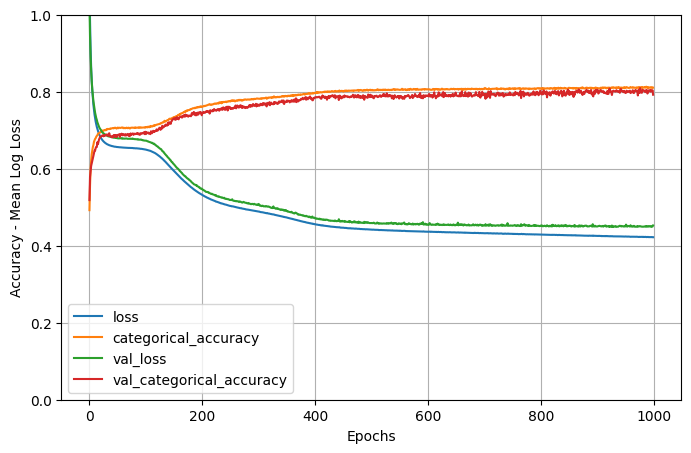

In [11]:
results=pd.DataFrame(history.history)
results.plot(figsize=(8, 5))
plt.grid(True)
plt.xlabel ("Epochs")
plt.ylabel ("Accuracy - Mean Log Loss")
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [12]:
training_accuracy = round(results.categorical_accuracy.values[-1:][0]*100, 2)
val_accuracy = round(results.val_categorical_accuracy.values[-1:][0]*100, 2)
training_error = round((1 - results.categorical_accuracy.values[-1:][0])*100, 2)
test_error = round((1 - results.val_categorical_accuracy.values[-1:][0])*100, 2)
human_error = 5
bias = round(training_error - human_error, 2)
variance = round(test_error - training_error, 2)
training_time = round(end_time - start_time)
print("Error (training):", training_error, "%")
print("Error (test):", test_error, "%")
print("Bias:", bias)
print("Variance:", variance)
print("Time: ", training_time, "seconds")

Error (training): 18.97 %
Error (test): 20.78 %
Bias: 13.97
Variance: 1.81
Time:  192 seconds


## Step 8: Save results

In [13]:
RESULTS_FOLDER = "../Results"
RESULTS_FILE = f"{RESULTS_FOLDER}/models_performance.csv"

In [14]:
results_df = pd.read_csv(RESULTS_FILE, index_col = 0)

In [15]:
COLUMNS = [
    'model_name',
    'epochs',
    'learning_rate',
    'batch_size',
    'activation',
    'loss',
    'optimizer',
    'regularization',
    'train_accuracy',
    'validation_accuracy',
    'bias',
    'variance',
    'training_time'
]

new_result = [[
    model_name,
    N_EPOCHS,
    LEARNING_RATE,
    BATCH_SIZE,
    ACTIVATION,
    "categorical_crossentropy",
    "SGD",
    "",
    training_accuracy,
    val_accuracy,
    bias,
    variance,
    training_time]]

new_result_df = pd.DataFrame(new_result, columns=COLUMNS)
concatenation = pd.concat([results_df, new_result_df], ignore_index=True)
concatenation.to_csv(RESULTS_FILE)


In [16]:
last_five = concatenation.tail(5)
print(last_five)
print("\n---Metrics---")
print(last_five[["train_accuracy", "validation_accuracy", "bias", "variance", "training_time"]].describe())

   model_name  epochs  learning_rate  batch_size activation  \
15       D512    1000            0.1         512       tanh   
16       D512    1000            0.1         512       tanh   
17       D512    1000            0.1         512       tanh   
18       D512    1000            0.1         512       tanh   
19       D512    1000            0.1         512       tanh   

                        loss optimizer regularization  train_accuracy  \
15  categorical_crossentropy       SGD            NaN           81.35   
16  categorical_crossentropy       SGD            NaN           81.30   
17  categorical_crossentropy       SGD            NaN           81.05   
18  categorical_crossentropy       SGD            NaN           81.16   
19  categorical_crossentropy       SGD                          81.03   

    validation_accuracy   bias  variance  training_time  
15                80.89  13.65      0.46            191  
16                80.33  13.70      0.97            186  
17      

In [17]:
MODELS_FOLDER = "../Models"
save_name = f"{MODELS_FOLDER}/{model_name}-4.h5"
my_model.save(save_name)